# Задача 1. Минимизация гладкой функции

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, line_search, rosen, differential_evolution

def f(x):
    return np.sin(x / 5.0) * np.exp(x / 10.0) + 5.0 * np.exp(-x / 2.0)

In [2]:
minimize(f, 2.0, method = 'BFGS')

      fun: 1.7452682903447336
 hess_inv: array([[ 5.98752645]])
      jac: array([ -2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627628])

In [3]:
minimize(f, 30.0, method = 'BFGS')

      fun: -11.898894665981265
 hess_inv: array([[ 1.67840334]])
      jac: array([  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([ 25.88019347])

In [4]:
def g(x):
    sin5 = np.sin(x / 5.0)
    cos5 = np.cos(x / 5.0)
    exp10 = np.exp(x / 10.0)
    exp2 = np.exp(-x / 2.0)
    return cos5 * exp10 / 5.0 + sin5 * exp10 / 10.0 - 5.0 * exp2 / 2.0

def H(x):
    sin5 = np.sin(x / 5.0)
    cos5 = np.cos(x / 5.0)
    exp10 = np.exp(x / 10.0)
    exp2 = np.exp(-x / 2.0)
    return cos5 * exp10 / 25.0 - 3.0 * sin5 * exp10 / 25.0 +  5.0 * exp2 / 4.0

def print_xk(xk): print(xk)

In [5]:
minimize(f, 12.0, method = 'BFGS', jac = g, callback = print_xk)

[ 25.57909388]
[ 57.29580311]
[ 57.2961018]
[ 57.29610948]


      fun: -275.3489418091126
 hess_inv: array([[ 0.07263739]])
      jac: array([  3.23880123e-09])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 4
     njev: 18
   status: 0
  success: True
        x: array([ 57.29610948])

In [6]:
minimize(f, 11.0, method = 'BFGS', jac = g, callback = print_xk)

[ 25.87982551]
[ 25.88019271]


      fun: -11.89889466598129
 hess_inv: array([[ 123.27578966]])
      jac: array([ -1.92103084e-07])
  message: 'Optimization terminated successfully.'
     nfev: 17
      nit: 2
     njev: 17
   status: 0
  success: True
        x: array([ 25.88019271])

In [7]:
i = 1
eps = 0.001
x_k = 12.0
B_k = 1.0

while (abs(g(x_k)) > eps):
    print('it %d before: x_k = %.2f, B_k = %.2f' % (i, x_k, B_k))
    
    p_k = -g(x_k) / B_k
    alpha_k = line_search(f, g, x_k, p_k)[0]
    x_k1 = x_k + alpha_k * p_k
    
    s_k = x_k1 - x_k
    y_k = g(x_k1) - g(x_k)
    
    x_k = x_k1
    B_k = y_k / s_k
    
    print('it %d after: x_k+1 = %.2f, B_k+1 = %.2f' % (i, x_k, B_k))
    
    i += 1

print('minimum: x = %.5f, f(x) = %.5f' % (x_k, f(x_k)))

it 1 before: x_k = 12.00, B_k = 1.00
it 1 after: x_k+1 = 25.76, B_k+1 = 0.01
it 2 before: x_k = 25.76, B_k = 0.01
it 2 after: x_k+1 = 25.88, B_k+1 = 0.59
it 3 before: x_k = 25.88, B_k = 0.59
it 3 after: x_k+1 = 25.88, B_k+1 = 0.59
minimum: x = 25.88024, f(x) = -11.89889


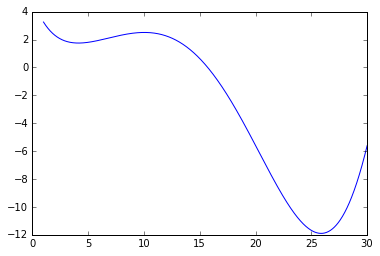

In [8]:
dom = np.linspace(1, 30, 1000)

plt.plot(dom, f(dom), '-')
plt.show()

# Задача 2: глобальная оптимизация

In [9]:
differential_evolution(f, [(1, 30)])

     fun: array([-11.89889467])
     jac: array([ 0.])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 4
 success: True
       x: array([ 25.88019284])

# Задача 3. Минимизация негладкой функции

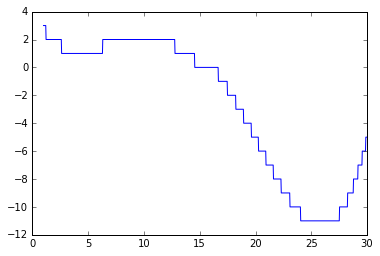

In [10]:
def h(x):
    return f(x).astype(int)

plt.plot(dom, h(dom))
plt.show()

In [11]:
minimize(h, 30.0, method = 'BFGS')

      fun: array([-5])
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])

In [12]:
differential_evolution(h, [(1, 30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([ 25.73742906])